In [28]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# load modules related to this exercise
from DurableConsumptionModel import DurableConsumptionModelClass 
import estimate

import numba as nb
nb.set_num_threads(8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
model = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','do_print':False})
model.precompile_numba() # solve with very coarse grids
model.solve()
model.simulate()

par = model.par
sol = model.sol
sim = model.sim

t= 38 i= 1898 
 adjust->keep -25.263470793215077 
 m+bump - x: -0.7578934543347395 
 consumption diff -0.2160026752819889
t= 38 i= 3206 
 adjust->keep -26.743054944012265 
 m+bump - x: -0.7973902026224426 
 consumption diff -0.22865311977130487


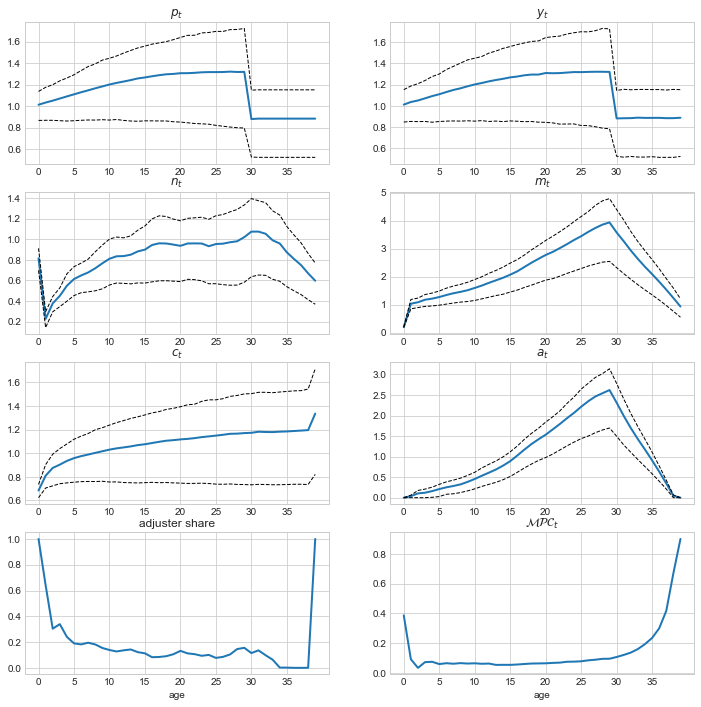

In [41]:
model.lifecycle(deciles=False)

In [77]:
data = copy.copy(sim)
par_beta = copy.copy(par.beta)
par_rho = copy.copy(par.rho)
data.moments = estimate.calc_moments(par,data)

In [78]:
data.moments.T

array([[0.25359147, 1.2165845 ],
       [0.27195369, 1.23034407],
       [0.29567633, 1.24429009],
       [0.3388962 , 1.25362559],
       [0.38295123, 1.26830767],
       [0.45787823, 1.27659063],
       [0.53962802, 1.28999683],
       [0.61575567, 1.29360326],
       [0.69197597, 1.29458083],
       [0.76230973, 1.30839355],
       [0.86581114, 1.31020883],
       [0.9737708 , 1.30810556],
       [1.09308506, 1.31379998],
       [1.21235517, 1.32031631],
       [1.3436801 , 1.31727436],
       [1.49125449, 1.31847226],
       [1.62629959, 1.32252852],
       [1.75648565, 1.32159367],
       [1.89370335, 1.3208463 ],
       [1.6393939 , 0.88439279],
       [1.37004912, 0.88218454],
       [1.15298764, 0.88645541],
       [0.95739492, 0.88946582],
       [0.77272849, 0.88610241],
       [0.586291  , 0.8842207 ],
       [0.40236405, 0.88861634]])

In [79]:
Nbeta = 3
Nrho = 3

obj = np.nan + np.zeros((Nbeta,Nrho))
beta = np.linspace(0.95,0.97,Nbeta)
rho = np.linspace(1.2,3,Nrho)

count = 1
for i in range(Nbeta):
    for j in range(Nrho):
        print(f"{count} / {Nbeta*Nrho}")
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        obj[i,j]=estimate.sum_squared_diff_moments(theta0,model,est_par,data)
        count += 1


1 / 9
Simulated moments:  [[0.16096793]
 [1.2147037 ]]
Simulated moments shape:  (2, 1)
Mean of moments:  [[0.16096793 0.17760661 0.17921359 0.19419125 0.20331665 0.23648928
  0.26325471 0.29382651 0.31335395 0.33785276 0.38456706 0.448894
  0.51215951 0.57475548 0.6745285  0.79812508 0.92438604 1.06839822
  1.24752814 1.03695087 0.81842289 0.65894865 0.52025262 0.3990803
  0.28879286 0.18913665]
 [1.2147037  1.23248068 1.24380606 1.25518365 1.26959445 1.27795617
  1.28903791 1.29642513 1.29220944 1.30847335 1.30900419 1.30773615
  1.31362996 1.31922134 1.31920912 1.31900679 1.32457852 1.31816519
  1.32227912 0.88194308 0.88345071 0.88358256 0.88845586 0.88743404
  0.89019261 0.88751887]]
2 / 9
Simulated moments:  [[0.25287249]
 [1.2147037 ]]
Simulated moments shape:  (2, 1)
Mean of moments:  [[0.25287249 0.27288977 0.29654836 0.33921198 0.3839284  0.46053005
  0.54011528 0.61682036 0.69132187 0.76098489 0.86705263 0.97459714
  1.09453688 1.20841614 1.3413843  1.49185758 1.62386227 1.7

/var/folders/d8/k9yj32vx0_76gfhvj06fhzzw0000gn/T/ipykernel_41063/1449269876.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


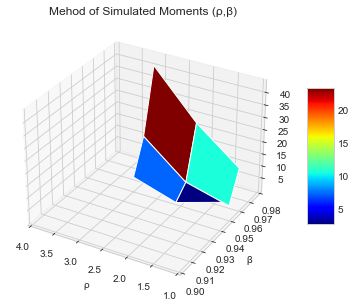

In [80]:
#Plot figure in three dimensions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, obj, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Mehod of Simulated Moments (\u03C1,\u03B2)')
ax.set_xlim(1.0,4.0)
#ax.set_xlim(1.0,6.0)
ax.set_ylim(0.9,0.98)
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

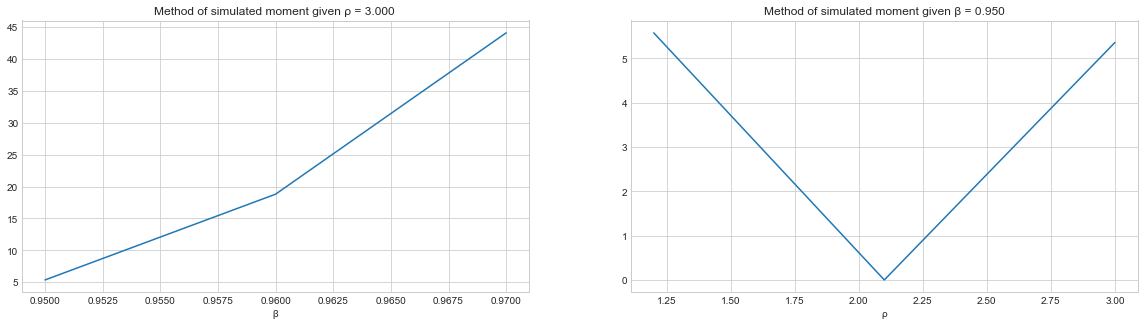

In [81]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to true beta


fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,obj[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Method of simulated moment given \u03C1 = {rho[i_rho]:.3f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,obj[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Method of simulated moment given \u03B2 = {beta[i_beta]:.3f}')


plt.show()

In [10]:
est_par = ['beta'] # Parameter to estimate
theta0 = [0.92] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)

print(f'Objective:               {est.fun:.4f}')
print(f'beta:                    {est.x[0]:.4f}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0163
beta:                    0.9750
Number of iterations:    3


In [11]:
est_par = ['rho'] # Parameter to estimate
theta0 = [4] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Objective:               0.0420
rho:                     3.5721
Number of iterartions:   3


In [19]:
est_par = ['rho','beta'] # Parameters to estimate
theta0 = [4, 0.94] # Initial guesses

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'beta:                    {est.x[1]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Traceback (most recent call last):
  File "/Users/frederikp/OneDrive - University of Copenhagen/Kandidat/Dynamic Programming/dp2022/praise_the_lord/DurableConsumptionModel.py", line 298, in solve
    post_decision.compute_wq(t,sol,par,compute_q=True)
KeyboardInterrupt


KeyboardInterrupt: 

In [25]:
print(sol.c_keep)

[[[[0.00000000e+00 7.52277641e-03 1.25578236e-02 ... 5.88029677e-01
    6.04148591e-01 6.22278930e-01]
   [0.00000000e+00 9.63427940e-03 1.31550486e-02 ... 5.21084873e-01
    5.35308389e-01 5.51384575e-01]
   [0.00000000e+00 1.08564001e-02 1.44200450e-02 ... 4.99850422e-01
    5.13376724e-01 5.28812351e-01]
   ...
   [0.00000000e+00 6.37971512e-02 8.66043861e-02 ... 4.76802959e-01
    4.87017793e-01 4.98755681e-01]
   [0.00000000e+00 6.37971512e-02 8.99047165e-02 ... 4.79185517e-01
    4.89354122e-01 5.01077165e-01]
   [0.00000000e+00 6.37971512e-02 9.36833292e-02 ... 4.81912449e-01
    4.92130130e-01 5.03728006e-01]]

  [[0.00000000e+00 4.60810525e-02 5.81236948e-02 ... 6.63206118e-01
    6.79318421e-01 6.97934440e-01]
   [0.00000000e+00 4.72291869e-02 5.60625283e-02 ... 5.87526374e-01
    6.01819245e-01 6.18294714e-01]
   [0.00000000e+00 4.97980459e-02 5.68393941e-02 ... 5.63328276e-01
    5.77011334e-01 5.92759688e-01]
   ...
   [0.00000000e+00 6.37971512e-02 1.27899179e-01 ... 5.26

In [27]:
par.grid_m

array([ 0.        ,  0.06379715,  0.12789918,  0.19231027,  0.25703472,
        0.32207692,  0.38744135,  0.45313264,  0.51915549,  0.58551474,
        0.65221536,  0.71926241,  0.78666111,  0.85441682,  0.92253501,
        0.99102132,  1.05988153,  1.12912158,  1.19874757,  1.26876577,
        1.33918263,  1.41000478,  1.48123903,  1.5528924 ,  1.62497212,
        1.69748562,  1.77044057,  1.84384486,  1.91770663,  1.99203428,
        2.06683648,  2.14212217,  2.21790057,  2.29418124,  2.37097404,
        2.44828915,  2.52613714,  2.60452891,  2.6834758 ,  2.7629895 ,
        2.84308218,  2.92376644,  3.00505536,  3.08696254,  3.16950209,
        3.25268869,  3.33653764,  3.42106484,  3.50628688,  3.59222105,
        3.67888541,  3.7662988 ,  3.85448094,  3.94345244,  4.03323491,
        4.12385097,  4.21532437,  4.30768007,  4.4009443 ,  4.49514466,
        4.59031024,  4.68647175,  4.78366163,  4.88191419,  4.98126578,
        5.08175497,  5.18342275,  5.28631276,  5.39047151,  5.49